#  ***TELECOM CHURN ANALYSIS***

##### **Project Type**    - EDA
##### **Member**          - HADI RIDA
##### **Presented To**    - FSD TEAM

# **Project Summary -**

Telecom companies often face customer attrition, where customers leave the company. Our project aimed to analyze this churn rate and identify the reasons behind it.

# **Problem Restatement**


Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

#### **Defining  Our Business Objective?**

*   Identifying the key cause of the customer churn
*   Provide steps to retain the valuable customer

# ***Let's Begin !***

## ***1. Know The Data***


### Import Libraries

In [166]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [167]:
# Load Dataset

df=pd.read_csv(r"C:\Users\Lenovo\Desktop\finall\WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Dataset First View

In [168]:
# Dataset First Look
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dataset Rows & Columns count

In [169]:
# Dataset Rows & Columns count
df.shape

(7043, 21)

### Dataset Information

In [170]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Duplicate Values

In [171]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

## ***2. Understanding Our Variables***

In [172]:
# Dataset columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [173]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [174]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### First Insights
SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

### Variables Description


##### customerID: A unique identifier for each customer.
##### gender: The customer's gender.
##### SeniorCitizen: Whether the customer is a senior citizen .
##### Partner: Whether the customer has a partner .
##### Dependents: Whether the customer has dependents .
##### tenure: The number of months the customer has been with the company.
##### PhoneService: Whether the customer has phone service .
##### MultipleLines: Whether the customer has multiple phone lines .
##### InternetService: The customer's internet service type (DSL, Fiber optic, or No internet service).
##### OnlineSecurity: Whether the customer has online security 
##### OnlineBackup: Whether the customer has online backup  .
##### DeviceProtection: Whether the customer has device protection .
##### TechSupport: Whether the customer has tech support .
##### StreamingTV: Whether the customer has streaming TV .
##### StreamingMovies: Whether the customer has streaming movies.
##### Contract: The type of contract the customer has (Month-to-month, One year, or Two year).
##### PaperlessBilling: Whether the customer has paperless billing .
##### PaymentMethod: The customer's payment method (Electronic check, Mailed check, or Bank transfer (automatic)).
##### MonthlyCharges: The customer's monthly charges.
##### TotalCharges: The customer's total charges over the course of their relationship with the company.
##### Churn: Whether the customer churned .


#### Missing Values/Null Values

In [175]:
# Missing Values/Null Values Count
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [176]:
telco_data=df.copy()


**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [177]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [178]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [179]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [180]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [181]:
# Get the max tenure
print(telco_data['tenure'].max())

72


In [182]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [183]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**6.** Remove columns not required for processing

In [184]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


**8.** Convert all the categorical variables into dummy variables

In [185]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0


# ***EDA :***

In [186]:
correlation_1 = telco_data_dummies['MonthlyCharges'].corr(telco_data_dummies['TotalCharges'])
#  0.6510648032262024 indicates a  strong positive correlation between the two variables being analyzed as expected 
correlation_1

0.6510648032262024

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13556\525280235.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churned_data, color="Blue", label="Churn", hist=False)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13556\525280235.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_churned_data, color="Red", label="No Churn", hist=False)


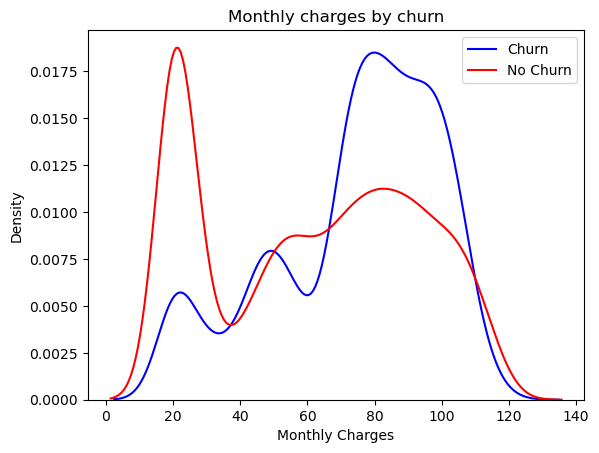

In [196]:

# Filter the data for customers who churned (Churn_Yes)
churned_data = telco_data_dummies.MonthlyCharges[telco_data_dummies["Churn_Yes"] == 1]
# Create a normal distribution plot for churned customers
sns.distplot(churned_data, color="Blue", label="Churn", hist=False)
# Filter the data for customers who did not churn (Churn_No)
not_churned_data = telco_data_dummies.MonthlyCharges[telco_data_dummies["Churn_No"] == 1]
# Create a normal distribution plot for non-churned customers
sns.distplot(not_churned_data, color="Red", label="No Churn", hist=False)
# Set labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Monthly charges by churn')
# Add a legend
plt.legend(loc='upper right')
# Show the plot
plt.show()


**Insight:** Churn is high when Monthly Charges are high

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13556\3779911254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churned_data, color="Blue", label="Churn", hist=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13556\3779911254.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

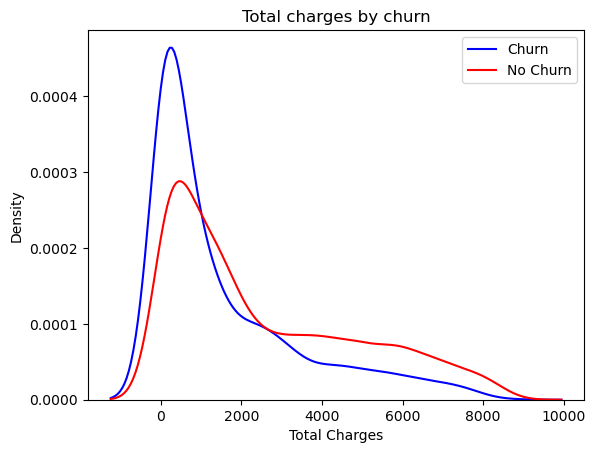

In [188]:

churned_data = telco_data_dummies.TotalCharges[telco_data_dummies["Churn_Yes"] == 1]
sns.distplot(churned_data, color="Blue", label="Churn", hist=False)
not_churned_data = telco_data_dummies.TotalCharges[telco_data_dummies["Churn_No"] == 1]
sns.distplot(not_churned_data, color="Red", label="No Churn", hist=False)
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Total charges by churn')
plt.legend(loc='upper right')
plt.show()


### TENURE  

In [189]:
# Here I used the data telco data set before turninig variables into dummy one due to there is sevral ranges an that would be more convenient
grouped_data = telco_data.groupby(['tenure_group', 'Churn']).size().unstack()
# Display the grouped data
print(grouped_data)

Churn           No   Yes
tenure_group            
1 - 12        1138  1037
13 - 24        730   294
25 - 36        652   180
37 - 48        617   145
49 - 60        712   120
61 - 72       1314    93


 ##### Tenure groups 1 - 12 months and 13 - 24 months have relatively high churn rates compared to other groups. This suggests that customers in these early tenure stages are more likely to churn.


However, when we combine the insights of three parameters, namely, tenure, monthly charges, and total charges, the picture becomes clearer: higher monthly charges with lower tenure result in lower total charges. Therefore, all three factors, namely, higher monthly charges, lower tenure, and lower total charges, are linked to high churn.

In [190]:
correlation_matrix =telco_data_dummies.corr()

churn_correlations = correlation_matrix['Churn_Yes'].sort_values(ascending=False)[1:]

# Display the correlations
print(churn_correlations)

Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
tenure_group_1 - 12                        0.319628
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
tenure_group_13 - 24                       0.019929
PhoneService

### TYPE OF CONTRACT
#### (A Netflix Case ?)

In [191]:
def analyze_churn_for_monthly_contracts(df):
    # Filter the DataFrame to include only customers with 'Contract_Month-to-month'
    monthly_contracts = telco_data_dummies[telco_data_dummies['Contract_Month-to-month'] ==0]
    
    # Count the number of customers who churned (Churn_Yes = 1) and who did not churn (Churn_No = 1)
    churned = monthly_contracts['Churn_Yes'].sum()
    not_churned = monthly_contracts['Churn_No'].sum()
    
    return {'Churned': churned, 'Not Churned=': not_churned}

print(telco_data_dummies[telco_data_dummies['Churn_Yes'] == 1]['Churn_Yes'].value_counts())
## 1869

result_M = analyze_churn_for_monthly_contracts(telco_data_dummies)
print(result_M)
#{'Churned': 1655, 'Not Churned=': 2220}
result_Y = analyze_churn_for_monthly_contracts(telco_data_dummies)
print(result_Y)
#{'Churned': 214, 'Not Churned=': 2943}

1    1869
Name: Churn_Yes, dtype: int64
{'Churned': 214, 'Not Churned=': 2943}
{'Churned': 214, 'Not Churned=': 2943}


Churn seems to be more prevalent among customers with monthly contracts than among those with yearly contracts. This is evident from the significantly higher number of churned cases in the monthly contract group.

### Online Security?


In [192]:
churn_by_security = telco_data_dummies.groupby('OnlineSecurity_No')['Churn_Yes'].value_counts().unstack()
# Fill missing values with 0 if necessary
churn_by_security.fillna(0, inplace=True)
# Rename the columns for clarity
churn_by_security.columns = ['Not Churned', 'Churned']
# Calculate the total number of customers in each group
churn_by_security['Total Customers'] = churn_by_security['Not Churned'] + churn_by_security['Churned']
# Calculate the percentage of customers who churned in each group
churn_by_security['Churn Percentage'] = (churn_by_security['Churned'] / churn_by_security['Total Customers']) * 100
print(churn_by_security)

                   Not Churned  Churned  Total Customers  Churn Percentage
OnlineSecurity_No                                                         
0                         3127      408             3535         11.541726
1                         2036     1461             3497         41.778667


- Customers without online security (OnlineSecurity_No = 1) have a significantly higher churn rate (41.78%) compared to customers with online security.
- Customers with online security (OnlineSecurity_No = 0) have a much lower churn rate (11.54%).

### Needing Some Attention ?
#### (Technical support)

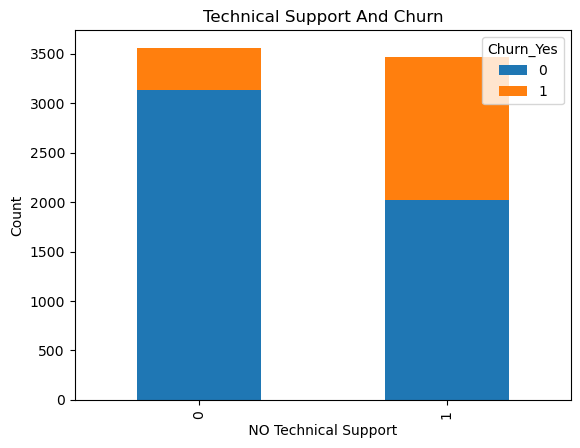

In [193]:
def group_and_plot(data):
    # Group data by "Technical_Support" and "Churn" and calculate counts
    grouped_data =telco_data_dummies.groupby(['TechSupport_No', 'Churn_Yes']).size().unstack()
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel(" NO Technical Support ")
    plt.ylabel("Count")
    plt.title("Technical Support And Churn")
    plt.legend(title="Churn_Yes", loc='upper right')
    plt.show()


group_and_plot(telco_data_dummies)

 ### This graph showed that among the group with no tech support almost half of them are churn

### InternetService/Fiber optic

In [194]:
def calculate_mean_monthly_charges(group):
    return group['MonthlyCharges'].mean()

# Use the apply function to group by 'InternetService' and calculate mean Monthly Charges
result = telco_data_dummies.groupby('InternetService_Fiber optic').apply(calculate_mean_monthly_charges)

# Print the result
print(result)

InternetService_Fiber optic
0    43.794868
1    91.500129
dtype: float64


The result shows that customers with Fiber optic internet service, on average, have substantially higher monthly charges (around $91.50) compared to those without Fiber optic service (about $43.79), suggesting that the cost of Fiber optic service may contribute to higher churn rates among these customers.

# **Conclusions / Recommendations**

**Problem 1: Churn in Early Tenure Stages (Reasons: Initial Dissatisfaction, Promotional Pricing, Expectation Mismatch)**

- Enhance onboarding experience.
- Clearly communicate promotional pricing terms.
- Set realistic expectations with new customers.

**Problem 2: Higher Churn Among Monthly Contracts (Factors: Contract Flexibility, Price Sensitivity, Engagement Levels)**

- Offer contract options for flexibility.
- Review pricing strategies for monthly contracts.
- Implement engagement initiatives.

**Problem 3: Churn Disparity Due to Online Security (Factors: Security Concerns, Perceived Risk, Competitive Offers, Support Quality)**

- Enhance online security features.
- Provide cybersecurity education.
- Offer competitive pricing packages.
- Ensure quality support for security inquiries.

**Problem 4: Absence of Technical Support Leading to Churn (Issues: Problem Resolution, Customer Satisfaction, Perceived Value, Competitive Landscape)**

- Provide technical support services.
- Improve overall service quality.
- Highlight the value of technical support.
- Ensure competitive support services.

**Problem 5: High Cost of Internet Service Driving Churn (Factors: Affordability, Price Sensitivity, Value for Money, Competitive Pricing)**

- Reassess pricing strategies for market alignment.
- Extend promotional rates for loyal customers.
- Communicate the value of your service.
- Monitor and adjust pricing competitively.
